In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('train.csv',usecols=['Survived','Age','Fare'])

In [4]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:3],df.iloc[:,0],test_size=0.2,random_state=42)

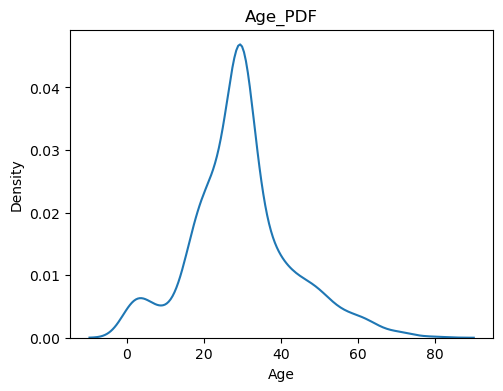

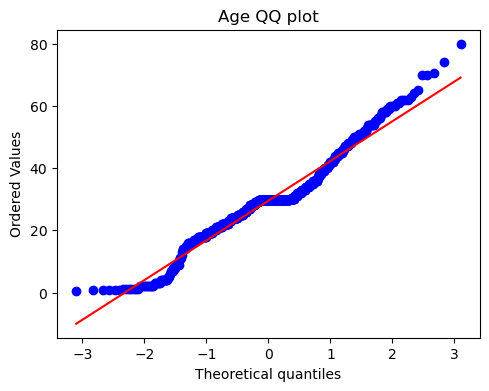

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(df['Age'],hist=False)
plt.title('Age_PDF')

plt.figure(figsize=(12,4))
plt.subplot(122)
sts.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')
plt.show()

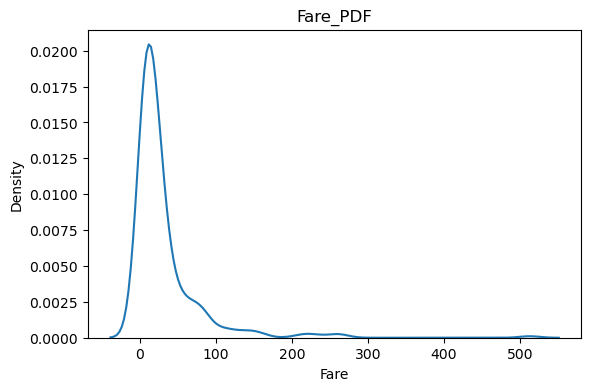

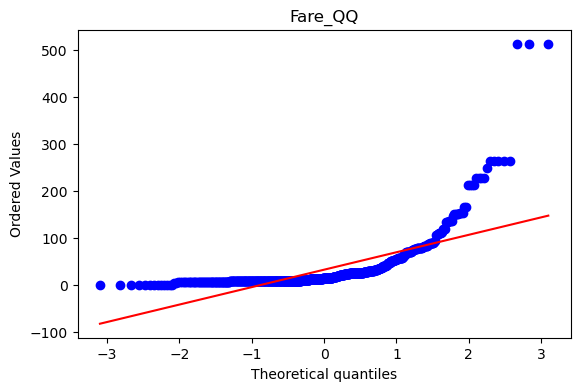

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Fare'],hist=False)
plt.title('Fare_PDF')
plt.figure(figsize=(14,4))
plt.subplot(121)
sts.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare_QQ')
plt.show()

without using any transformation

In [12]:
lr=LogisticRegression()
clf=DecisionTreeClassifier()

In [13]:
lr.fit(X_train,y_train)
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred=lr.predict(X_test)
Y_pred=clf.predict(X_test)

In [15]:
print('Accuracy_score of LR is',accuracy_score(y_pred,y_test))
print('Accuracy_score of DT is',accuracy_score(Y_pred,y_test))

Accuracy_score of LR is 0.6480446927374302
Accuracy_score of DT is 0.6759776536312849


FUNCTION TRANSFORMER

In [16]:
!pip install --upgrade numpy

In [17]:
trf=FunctionTransformer(func=np.log1p)

In [18]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [19]:
lr.fit(X_train_transformed,y_train)
clf.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [20]:
y1_pred=lr.predict(X_test_transformed)
Y1_pred=clf.predict(X_test_transformed)

In [21]:
print('Accuracy_score of LR is',accuracy_score(y1_pred,y_test))
print('Accuracy_score of DT is',accuracy_score(Y1_pred,y_test))

Accuracy_score of LR is 0.6815642458100558
Accuracy_score of DT is 0.6759776536312849


CROSS VALIDATING

In [22]:
X_transformed=trf.transform(X)
print('LR',np.mean(cross_val_score(lr,X_transformed,y,scoring='accuracy',cv=10)))
print('DT',np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6610611735330836


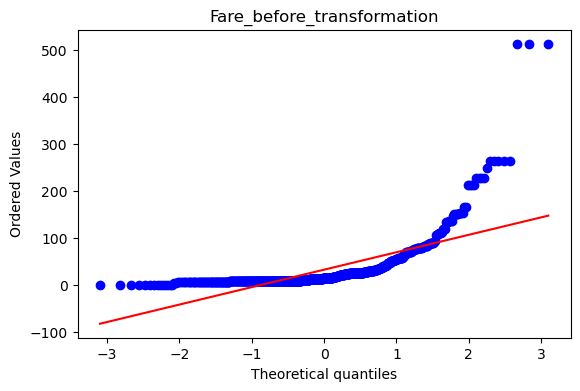

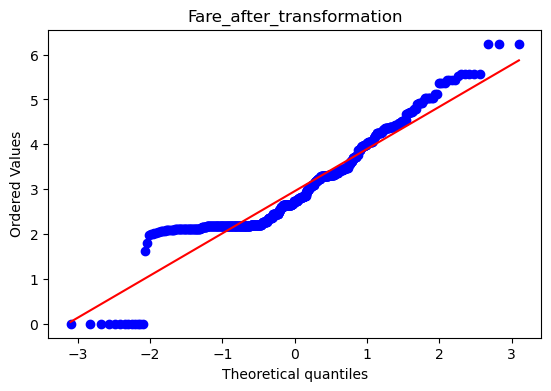

In [23]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sts.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare_before_transformation')
plt.figure(figsize=(14,4))
plt.subplot(122)
sts.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare_after_transformation')
plt.show()


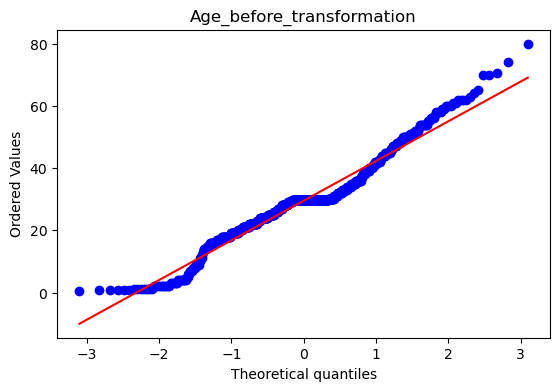

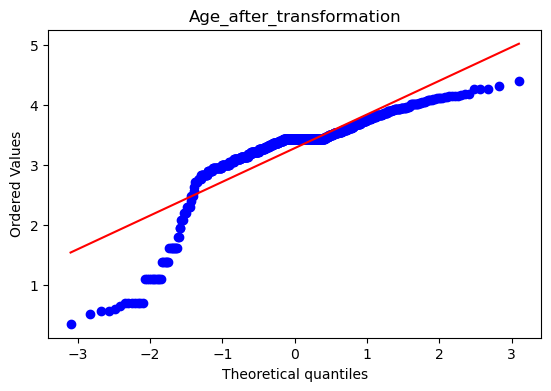

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sts.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age_before_transformation')
plt.figure(figsize=(14,4))
plt.subplot(122)
sts.probplot(X_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age_after_transformation')
plt.show()


performing column_transfer of Fare only

In [28]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
X_train_transformed=trf2.fit_transform(X_train)
X_test_transformed=trf2.fit_transform(X_test)

In [30]:
lr.fit(X_train_transformed,y_train)

LogisticRegression()

In [31]:
clf.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [32]:
y2_pred=lr.predict(X_test_transformed)
Y2_pred=clf.predict(X_test_transformed)

In [33]:
print('Accuracy_score of LR is',accuracy_score(y2_pred,y_test))
print('Accuracy_score of DT is',accuracy_score(Y2_pred,y_test))

Accuracy_score of LR is 0.6703910614525139
Accuracy_score of DT is 0.6759776536312849


In [35]:
X_transformed=trf2.transform(X)
print('LR',np.mean(cross_val_score(lr,X_transformed,y,scoring='accuracy',cv=10)))
print('DT',np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6633083645443196


**RECIPROCAL,SQUARE,SQRT TRANSFORMATION**

In [42]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

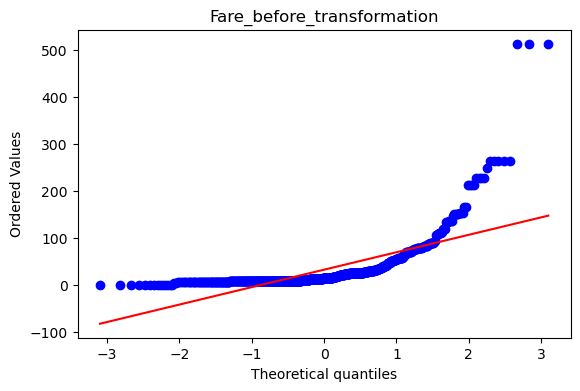

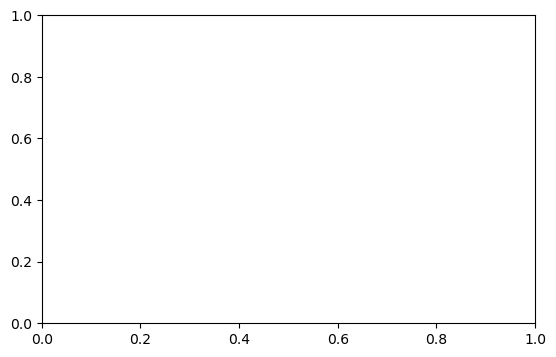

In [43]:
apply_transformation(lambda x:x)